In [ ]:
# importing important libraray
import numpy as np

# to obtain iris dataset
from sklearn.datasets import load_iris



def getArtificialData(mean, cov, nx, nt):               # Step 1: Implement the getArtificialData function
    x_train = np.random.multivariate_normal(mean, cov, nx)
    t_test = np.random.multivariate_normal(mean, cov, nt)

    sum_train=0
    for i in x_train:
      sum_train=sum_train+i

    mean_estimate=sum_train/(len(x_train))
    Nc = nx
    diff = x_train - mean_estimate
    cov_estimate = np.dot(diff.T, diff) / Nc

    return x_train, t_test, mean_estimate, cov_estimate




def evaluateMultiVarGauss(t_test, mu, cov_estimate):    # STEP 2:  the  evaluateMultiVarGauss  function
    d = t_test.shape[0]
    coeffi = 1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(cov_estimate))
    exponent = -0.5 * np.sum(np.dot((t_test - mu), np.linalg.inv(cov_estimate)) * (t_test - mu), axis=1)
    return coeffi * np.exp(exponent)



def calculateTestSet(t_test, pXY, yEx):   # step 3: The calculateTestSet function
    num_points = t_test.shape[0]
    num_classes = pXY.shape[1]


    posterior = pXY / np.sum(pXY, axis=1, keepdims=True)     # Bayes' rule of probabilities

    mismatched = 0   # Initialised themismatched as zero
    for i in range(num_points):
        print(f'Test Point : { i+1}')
        print( f'Probabilities of the classes C0,c1,c2 for the test point are : {pXY[i]}')
        print(f'Actual Class: {yEx[i]}')

        # Predicted label using Bayes' rule
        predicted_class = np.argmax(posterior[i])
        print(f'Predicted Class:{ predicted_class}')

        if predicted_class != yEx[i]:
           mismatched += 1

        print()

    print(f'The number of Misclassified Points are :{mismatched}')


mean_c0 = [0, 0]                      #  Given data for three classes
cov_c0 = [[2, 1], [1, 50]]
nx_c0 = 40
nt_c0 = 10

mean_c1 = [7, 5]
cov_c1 = [[3, 1], [1, 3]]
nx_c1 = 80
nt_c1 = 20

mean_c2 = [-5, 5]
cov_c2 = [[5, 2], [2, 3]]
nx_c2 = 20
nt_c2 = 5

x_c0, t_c0, mu_c0, cov_estimate_c0 = getArtificialData(mean_c0, cov_c0, nx_c0, nt_c0)
x_c1, t_c1, mu_c1, cov_estimate_c1 = getArtificialData(mean_c1, cov_c1, nx_c1, nt_c1)
x_c2, t_c2, mu_c2, cov_estimate_c2 = getArtificialData(mean_c2, cov_c2, nx_c2, nt_c2)


x = np.concatenate((x_c0, x_c1, x_c2))
t = np.concatenate((t_c0, t_c1, t_c2))
y = np.concatenate((np.zeros(nt_c0), np.ones(nt_c1), 2 * np.ones(nt_c2)))



probabilities = []                                              # with quadratic decision boundaries
for mu, cov_estimate in [(mu_c0, cov_estimate_c0), (mu_c1, cov_estimate_c1), (mu_c2, cov_estimate_c2)]:
    prob = evaluateMultiVarGauss(t, mu, cov_estimate)
    probabilities.append(prob)
probabilities = np.array(probabilities).T

calculateTestSet(t, probabilities, y)




                                                                 # The code to handle tied covariances
tied_cov = (nx_c0 * cov_estimate_c0 + nx_c1 * cov_estimate_c1 + nx_c2 * cov_estimate_c2) / (nx_c0 + nx_c1 + nx_c2)
tied_probabilities = []
for mu in [mu_c0, mu_c1, mu_c2]:
    prob = evaluateMultiVarGauss(t, mu, tied_cov)
    tied_probabilities.append(prob)
tied_probabilities = np.array(tied_probabilities).T

calculateTestSet(t, tied_probabilities, y)



Test Point : 1
Probabilities of the classes C0,c1,c2 for the test point are : [1.40990578e-16 8.74208407e-35 4.02833184e-39]
Actual Class: 0.0
Predicted Class:0

Test Point : 2
Probabilities of the classes C0,c1,c2 for the test point are : [2.19295922e-16 2.13061627e-29 1.97651813e-33]
Actual Class: 0.0
Predicted Class:0

Test Point : 3
Probabilities of the classes C0,c1,c2 for the test point are : [6.61257012e-16 7.35073388e-19 4.55845855e-17]
Actual Class: 0.0
Predicted Class:0

Test Point : 4
Probabilities of the classes C0,c1,c2 for the test point are : [5.24742174e-16 3.80121526e-21 1.05800773e-18]
Actual Class: 0.0
Predicted Class:0

Test Point : 5
Probabilities of the classes C0,c1,c2 for the test point are : [4.19300863e-16 8.96667433e-26 5.91488775e-28]
Actual Class: 0.0
Predicted Class:0

Test Point : 6
Probabilities of the classes C0,c1,c2 for the test point are : [8.27653869e-16 2.80513528e-18 1.24528469e-18]
Actual Class: 0.0
Predicted Class:0

Test Point : 7
Probabilities

In [ ]:

def compute_sample_stats(data):    # to compute sample mean and covariance

    mu = np.mean(data, axis=0)
    Sgm = np.cov(data, rowvar=False)
    return mu, Sgm

#  Loads the Iris dataset and splits it into training and test sets.
def getIrisData(n_train, n_test):      # Testing Iris dataset
    iris = load_iris()
    data = iris.data
    labels = iris.target



    x_train = []
    x_test = []
    y_train = []
    y_test = []

    for c in range(3):
        indices = np.where(labels == c)[0]
        x_train.extend(data[indices[:n_train]])
        x_test.extend(data[indices[n_train:n_train+n_test]])
        y_train.extend([c] * n_train)
        y_test.extend([c] * n_test)

    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return x_train, x_test, y_train, y_test

# Parameters
n_train = 40
n_test = 10

# Get Iris data
x_train, x_test, y_train, y_test = getIrisData(n_train, n_test)

# Compute class probabilities for training set
CMean = []
CSgm = []
for c in range(3):
    indices = np.where(y_train == c)[0]
    x_c = x_train[indices]
    mu_c, Sgm_c = compute_sample_stats(x_c)
    CMean.append(mu_c)
    CSgm.append(Sgm_c)


probabilities = []
for i in range(3):                 # multivariate Gaussian distribution on test set
    prob = evaluateMultiVarGauss(x_test, CMean[i], CSgm[i])
    probabilities.append(prob)
probabilities = np.array(probabilities).T

pXY = probabilities / np.sum(probabilities, axis=1)[:, np.newaxis]        #using Bayes' formula


predictions = np.argmax(pXY, axis=1)


calculateTestSet(x_test, pXY, y_test)    # Finally Calculate test set results

Test Point : 1
Probabilities of the classes C0,c1,c2 for the test point are : [1.00000000e+00 7.53616315e-24 1.19721709e-36]
Actual Class: 0
Predicted Class:0

Test Point : 2
Probabilities of the classes C0,c1,c2 for the test point are : [9.99999999e-01 5.92003584e-10 1.63532584e-23]
Actual Class: 0
Predicted Class:0

Test Point : 3
Probabilities of the classes C0,c1,c2 for the test point are : [1.00000000e+00 6.94835316e-20 7.87668757e-30]
Actual Class: 0
Predicted Class:0

Test Point : 4
Probabilities of the classes C0,c1,c2 for the test point are : [1.00000000e+00 7.45095414e-16 1.38173153e-26]
Actual Class: 0
Predicted Class:0

Test Point : 5
Probabilities of the classes C0,c1,c2 for the test point are : [1.00000000e+00 6.39884649e-20 8.50423252e-29]
Actual Class: 0
Predicted Class:0

Test Point : 6
Probabilities of the classes C0,c1,c2 for the test point are : [1.00000000e+00 5.82702768e-17 7.56295775e-30]
Actual Class: 0
Predicted Class:0

Test Point : 7
Probabilities of the clas

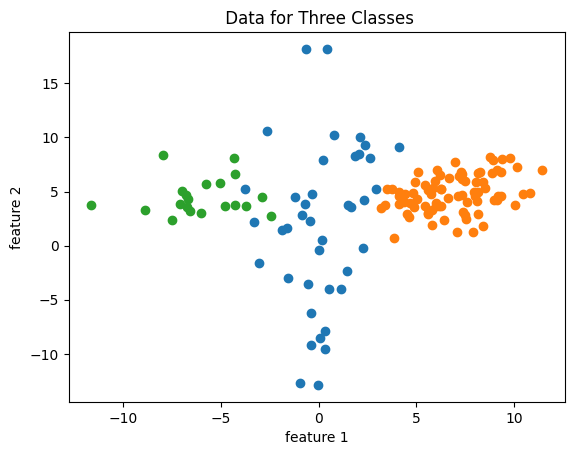

In [ ]:
plt.scatter(x_c0[:, 0], x_c0[:, 1], label='Class 0')
plt.scatter(x_c1[:, 0], x_c1[:, 1], label='Class 1')
plt.scatter(x_c2[:, 0], x_c2[:, 1], label='Class 2')

plt.title(' Data for Three Classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.show()